In [1]:
import os
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
INPUT_DIR = '../input/Financial'

In [3]:
files = os.listdir(INPUT_DIR)
files

['test_data.csv', 'test_data_hidden.csv', 'train_data.csv']

In [4]:
input_files = {}
for file in files:
    if 'train' in file:
        input_files['train_data'] = INPUT_DIR + '/' + file
    elif 'hidden' in file:
        input_files['test_hidden'] = INPUT_DIR + '/' + file
    else:
        input_files['test_data'] = INPUT_DIR + '/' + file
input_files

{'test_data': '../input/Financial/test_data.csv',
 'test_hidden': '../input/Financial/test_data_hidden.csv',
 'train_data': '../input/Financial/train_data.csv'}

In [5]:
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [6]:
train_df = reduce_mem_usage(pd.read_csv(input_files['train_data']))
train_df.head()

Mem. usage decreased to 13.69 Mb (74.6% reduction)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,38355.0,1.043945,0.318604,1.045898,2.806641,-0.561035,-0.367920,0.032745,-0.042328,-0.322754,...,-0.240112,-0.680176,0.085327,0.684570,0.318604,-0.204956,0.001661,0.037903,49.65625,0
1,22555.0,-1.665039,0.808594,1.805664,1.903320,-0.821777,0.934570,-0.824707,0.976074,1.747070,...,-0.335449,-0.511230,0.035828,0.147583,-0.529297,-0.566895,-0.596191,-0.220093,16.93750,0
2,2431.0,-0.323975,0.602051,0.865234,-2.138672,0.294678,-1.251953,1.072266,-0.334961,1.071289,...,0.012222,0.352783,-0.341553,-0.145752,0.094177,-0.804199,0.229370,-0.021622,1.00000,0
3,86773.0,-0.258301,1.217773,-0.585449,-0.875488,1.222656,-0.311035,1.074219,-0.161377,0.200684,...,-0.424561,-0.781250,0.019318,0.178589,-0.315674,0.096680,0.269775,-0.020630,10.78125,0
4,127202.0,2.142578,-0.494873,-1.936523,-0.818359,-0.025208,-1.027344,-0.151611,-0.305664,-0.869629,...,0.010117,0.021729,0.079468,-0.480957,0.023849,-0.279053,-0.030121,-0.043884,39.96875,0


In [7]:
test_df = reduce_mem_usage(pd.read_csv(input_files['test_data']))
test_df.head()

Mem. usage decreased to  3.37 Mb (74.2% reduction)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,113050.0,0.114685,0.796387,-0.149536,-0.823242,0.878906,-0.553223,0.939453,-0.108521,0.111145,...,-0.042725,-0.335693,-0.807617,-0.055939,-1.025391,-0.369629,0.204712,0.242676,0.085693,0.890137
1,26667.0,-0.039307,0.495850,-0.811035,0.546875,1.986328,4.386719,-1.344727,-1.744141,-0.562988,...,0.926270,-1.376953,-0.072205,-0.197632,1.014648,1.011719,-0.167725,0.113159,0.256836,85.000000
2,159519.0,2.275391,-1.531250,-1.021484,-1.602539,-1.220703,-0.462402,-1.196289,-0.147095,-0.950195,...,-0.408203,-0.193237,-0.103516,0.151001,-0.811035,-0.197876,-0.128418,0.014198,-0.051300,42.687500
3,137545.0,1.940430,-0.357666,-1.210938,0.382568,0.050812,-0.171265,-0.109131,-0.002115,0.869141,...,-0.199219,0.157959,0.650391,0.034210,0.739746,0.223633,-0.195557,-0.012794,-0.056854,29.984375
4,63369.0,1.081055,-0.502441,1.076172,-0.543457,-1.472656,-1.065430,-0.443115,-0.143433,1.660156,...,0.059875,0.224121,0.821289,-0.137207,0.986328,0.562988,-0.574219,0.089661,0.052032,68.000000


In [8]:
test_hidden_df = reduce_mem_usage(pd.read_csv(input_files['test_hidden']))
test_hidden_df.head()

Mem. usage decreased to  3.42 Mb (74.6% reduction)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,113050.0,0.114685,0.796387,-0.149536,-0.823242,0.878906,-0.553223,0.939453,-0.108521,0.111145,...,-0.335693,-0.807617,-0.055939,-1.025391,-0.369629,0.204712,0.242676,0.085693,0.890137,0
1,26667.0,-0.039307,0.495850,-0.811035,0.546875,1.986328,4.386719,-1.344727,-1.744141,-0.562988,...,-1.376953,-0.072205,-0.197632,1.014648,1.011719,-0.167725,0.113159,0.256836,85.000000,0
2,159519.0,2.275391,-1.531250,-1.021484,-1.602539,-1.220703,-0.462402,-1.196289,-0.147095,-0.950195,...,-0.193237,-0.103516,0.151001,-0.811035,-0.197876,-0.128418,0.014198,-0.051300,42.687500,0
3,137545.0,1.940430,-0.357666,-1.210938,0.382568,0.050812,-0.171265,-0.109131,-0.002115,0.869141,...,0.157959,0.650391,0.034210,0.739746,0.223633,-0.195557,-0.012794,-0.056854,29.984375,0
4,63369.0,1.081055,-0.502441,1.076172,-0.543457,-1.472656,-1.065430,-0.443115,-0.143433,1.660156,...,0.224121,0.821289,-0.137207,0.986328,0.562988,-0.574219,0.089661,0.052032,68.000000,0


In [9]:
from sklearn.metrics import accuracy_score, log_loss, roc_auc_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, mean_squared_error

In [10]:
def print_stats(Ytrain, Yval, Ytrain_, Yval_):
    print('Training Results:')
    print('=================================================')
    print('Accuracy Score:')
    print(accuracy_score(Ytrain, Ytrain_))
    print()
    print('Mean Squared Error:')
    print(mean_squared_error(Ytrain, Ytrain_))
    print()
    print('Log Loss:')
    print(log_loss(Ytrain, Ytrain_))
    print()
    print('ROC_AUC Score:')
    print(roc_auc_score(Ytrain, Ytrain_))
    print()
    print('Precision Score:')
    print(precision_score(Ytrain, Ytrain_))
    print()
    print('Recall Score:')
    print(recall_score(Ytrain, Ytrain_))
    print()
    print('F1 Score:')
    print(f1_score(Ytrain, Ytrain_))
    print()
    print('Confusion Matrix:')
    print(confusion_matrix(Ytrain, Ytrain_))
    print()
    print('Classification Report:')
    print(classification_report(Ytrain, Ytrain_))
    print()
    print('Validation Results:')
    print('=================================================')
    print('Accuracy Score:')
    print(accuracy_score(Yval, Yval_))
    print()
    print('Mean Squared Error:')
    print(mean_squared_error(Yval, Yval_))
    print()
    print('Log Loss:')
    print(log_loss(Yval, Yval_))
    print()
    print('ROC_AUC Score:')
    print(roc_auc_score(Yval, Yval_))
    print()
    print('Precision Score:')
    print(precision_score(Yval, Yval_))
    print()
    print('Recall Score:')
    print(recall_score(Yval, Yval_))
    print()
    print('F1 Score:')
    print(f1_score(Yval, Yval_))
    print()
    print('Confusion Matrix:')
    print(confusion_matrix(Yval, Yval_))
    print()
    print('Classification Report:')
    print(classification_report(Yval, Yval_))
    print()

In [11]:
Xtrain = pickle.load(open('Xtrain.data', 'rb'))
Xtest = pickle.load(open('Xtest.data', 'rb'))
Xval = pickle.load(open('Xval.data', 'rb'))
Ytrain = pickle.load(open('Ytrain.data', 'rb'))
Yval = pickle.load(open('Yval.data', 'rb'))

In [12]:
from keras.models import load_model

Using TensorFlow backend.


In [13]:
clf = load_model('./models/model_ANN_01.h5')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


In [14]:
Ytrain_ = clf.predict(Xtrain) > 0.5
Yval_ = clf.predict(Xval) > 0.5

In [15]:
print_stats(Ytrain, Yval, Ytrain_, Yval_) 

Training Results:
Accuracy Score:
0.9967113795938466

Mean Squared Error:
0.0032886204061534133

Log Loss:
0.11358755442829967

ROC_AUC Score:
0.9967113795938466

Precision Score:
0.9934657366115301

Recall Score:
1.0

F1 Score:
0.9967221591680946

Confusion Matrix:
[[225955   1496]
 [     0 227451]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    227451
           1       0.99      1.00      1.00    227451

    accuracy                           1.00    454902
   macro avg       1.00      1.00      1.00    454902
weighted avg       1.00      1.00      1.00    454902


Validation Results:
Accuracy Score:
0.9929953302201467

Mean Squared Error:
0.007004669779853236

Log Loss:
0.24193805745221186

ROC_AUC Score:
0.8997199189186086

Precision Score:
0.1721132897603486

Recall Score:
0.8061224489795918

F1 Score:
0.28366247755834834

Confusion Matrix:
[[56484   380]
 [   19    79]]

Classification Report:
       

In [31]:
def map_cm(x, y):
    if x == y & y == 1:
        return 'TP'
    if x != y & y == 1:
        return 'FP'
    if x == y & y == 0:
        return 'TN'
    if x != y & y == 0:
        return 'FN'

In [32]:
Ytrain_ = clf.predict(Xtrain)
Yval_ = clf.predict(Xval)
df_pred_ytrain = pd.DataFrame(data=Ytrain_,columns=['Proba'] )
df_pred_yval = pd.DataFrame(data=Yval_, columns=['Proba'])
df_pred_ytrain['Actual'] = Ytrain.values
df_pred_ytrain['Prediction'] = df_pred_ytrain['Proba'].map(lambda x: 1 if x > 0.5 else 0)
df_pred_ytrain['Remarks'] = df_pred_ytrain[['Actual', 'Prediction']].apply(lambda x: map_cm(x['Actual'], x['Prediction']), axis=1)
df_pred_yval['Actual'] = Yval.values
df_pred_yval['Prediction'] = df_pred_yval['Proba'].apply(lambda x: 1 if x > 0.5 else 0)
df_pred_yval['Remarks'] = df_pred_yval[['Actual', 'Prediction']].apply(lambda x: map_cm(x['Actual'], x['Prediction']), axis=1)

In [33]:
df_pred_ytrain.head()

,Proba,Actual,Prediction,Remarks
0,4.953146e-04,0,0,TN
1,1.787543e-04,0,0,TN
2,5.364418e-07,0,0,TN
3,1.334548e-04,0,0,TN
4,8.046627e-07,0,0,TN


In [34]:
df_pred_yval.head()

,Proba,Actual,Prediction,Remarks
0,0.000000,0,0,TN
1,0.000108,0,0,TN
2,0.000000,0,0,TN
3,0.001033,0,0,TN
4,0.001037,0,0,TN


In [35]:
df_pred_yval['Remarks'].value_counts()

TN    56484
FP      380
TP       79
FN       19
Name: Remarks, dtype: int64

In [36]:
df_pred_ytrain['Remarks'].value_counts()

TP    227451
TN    225955
FP      1496
Name: Remarks, dtype: int64

In [43]:
val_view = test_hidden_df.join(df_pred_yval)

In [47]:
val_view = val_view.drop(columns=['Proba', 'Actual', 'Prediction', 'Class'])
val_view

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Remarks
0,113050.0,0.114685,0.796387,-0.149536,-0.823242,0.878906,-0.553223,0.939453,-0.108521,0.111145,...,-0.335693,-0.807617,-0.055939,-1.025391,-0.369629,0.204712,0.242676,0.085693,0.890137,TN
1,26667.0,-0.039307,0.495850,-0.811035,0.546875,1.986328,4.386719,-1.344727,-1.744141,-0.562988,...,-1.376953,-0.072205,-0.197632,1.014648,1.011719,-0.167725,0.113159,0.256836,85.000000,TN
2,159519.0,2.275391,-1.531250,-1.021484,-1.602539,-1.220703,-0.462402,-1.196289,-0.147095,-0.950195,...,-0.193237,-0.103516,0.151001,-0.811035,-0.197876,-0.128418,0.014198,-0.051300,42.687500,TN
3,137545.0,1.940430,-0.357666,-1.210938,0.382568,0.050812,-0.171265,-0.109131,-0.002115,0.869141,...,0.157959,0.650391,0.034210,0.739746,0.223633,-0.195557,-0.012794,-0.056854,29.984375,TN
4,63369.0,1.081055,-0.502441,1.076172,-0.543457,-1.472656,-1.065430,-0.443115,-0.143433,1.660156,...,0.224121,0.821289,-0.137207,0.986328,0.562988,-0.574219,0.089661,0.052032,68.000000,TN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56957,136579.0,2.031250,-0.825195,-0.729492,-0.519043,-0.640137,-0.169434,-0.619141,-0.017899,-0.578613,...,-0.790039,-1.825195,0.600098,0.702637,-0.782715,-0.007103,-0.041046,-0.038605,42.406250,TN
56958,150070.0,-0.263916,1.120117,-0.639160,-0.880371,1.194336,-0.310791,0.961914,-0.088867,0.386719,...,-0.447998,-0.893066,0.004677,0.062561,-0.347656,0.106506,0.274170,-0.036255,7.988281,TN
56959,138634.0,2.207031,-0.748535,-1.443359,-1.101562,-0.332275,-0.646973,-0.536133,-0.129395,-0.712402,...,0.471436,1.314453,0.038940,0.747559,0.157959,0.021896,-0.046204,-0.072571,1.000000,TN
56960,53907.0,1.430664,-0.842285,0.416016,-1.328125,-1.284180,-0.888184,-0.653320,-0.238159,-2.220703,...,-0.577637,-1.324219,0.336914,0.329834,-0.007423,-0.636230,0.037109,0.029175,30.000000,TN


In [48]:
import seaborn as sns 

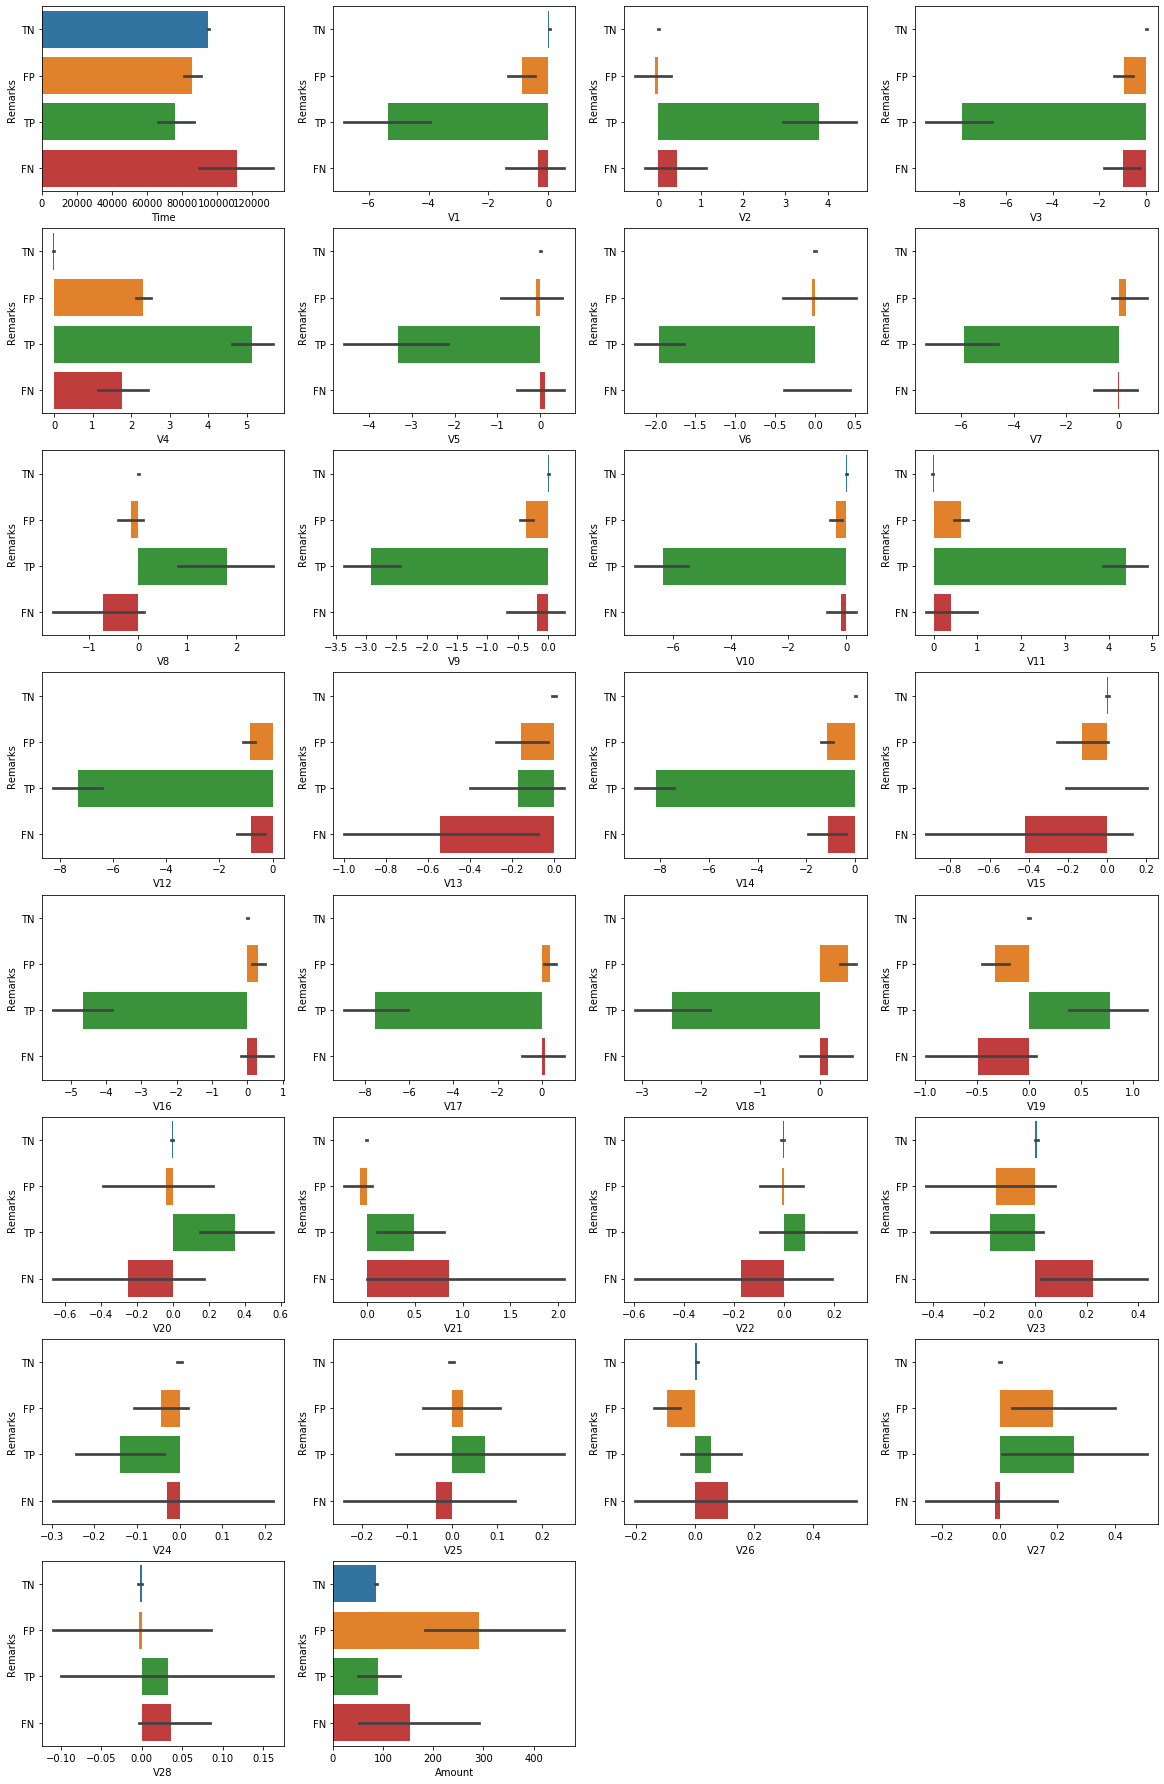

In [59]:
plt.figure(figsize=(20, 32))
for index, column in enumerate(val_view.drop(columns=['Remarks']).columns):
    plt.subplot(8, 4, index+1)
    sns.barplot(x=column, y='Remarks', data=val_view)
plt.savefig('./dump/val_view_sns_barplot.png')

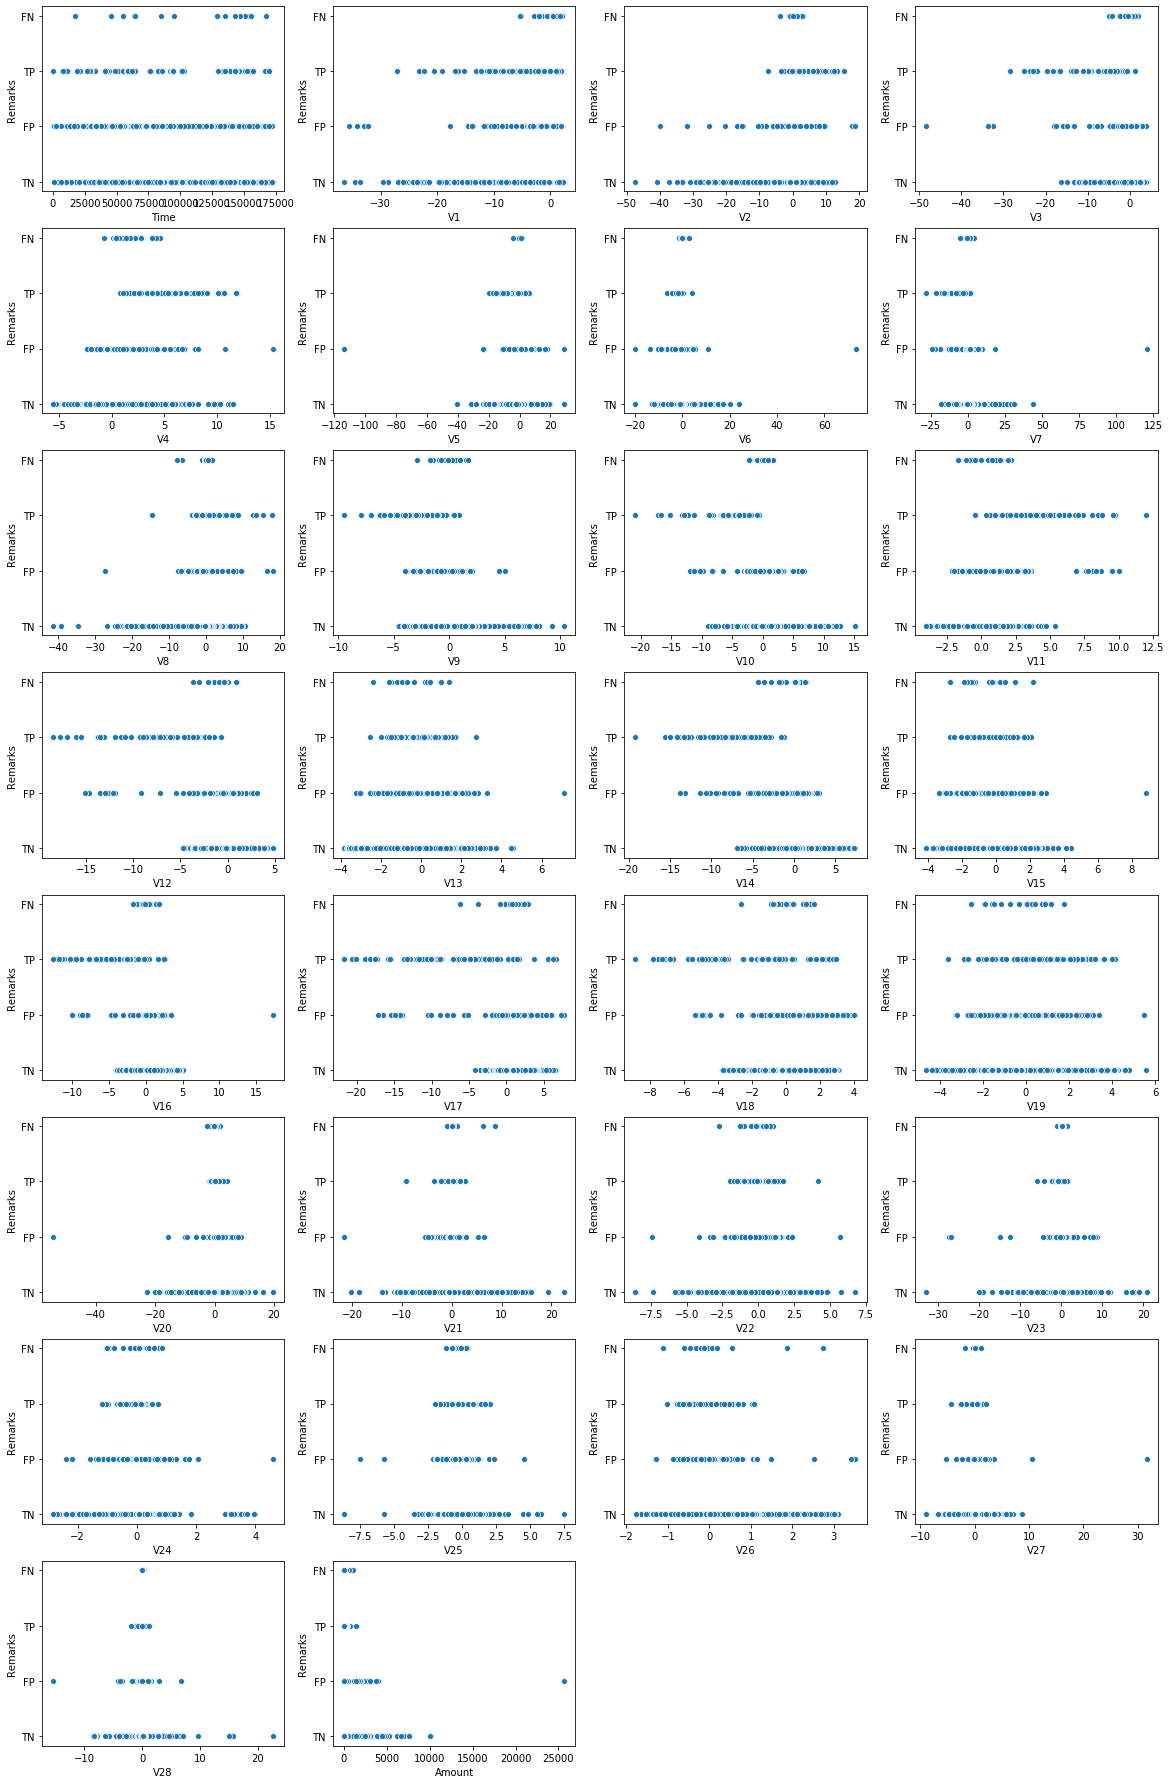

In [62]:
plt.figure(figsize=(20, 32))
for index, column in enumerate(val_view.drop(columns=['Remarks']).columns):
    plt.subplot(8, 4, index+1)
    sns.scatterplot(x=column, y='Remarks', data=val_view)
plt.savefig('./dump/val_view_sns_scatterplot.png')